In [1]:
import os
os.chdir(r'E:\data processing')

First few rows of the dataset:
            source host_name  host_location host_is_superhost  \
0  previous scrape      Lisa  Asheville, NC                 t   
1      city scrape   BonPaul  Asheville, NC                 f   
2      city scrape   BonPaul  Asheville, NC                 f   
3      city scrape   BonPaul  Asheville, NC                 f   
4      city scrape      Timo  Asheville, NC                 t   

   host_total_listings_count          property_type        room_type  \
0                          5     Entire rental unit  Entire home/apt   
1                         12      Entire guesthouse  Entire home/apt   
2                         12   Private room in home     Private room   
3                         12  Shared room in hostel      Shared room   
4                          2   Private room in home     Private room   

   accommodates  beds    price  ...  review_scores_checkin  \
0             2   1.0      NaN  ...                   4.86   
1             2   1.0

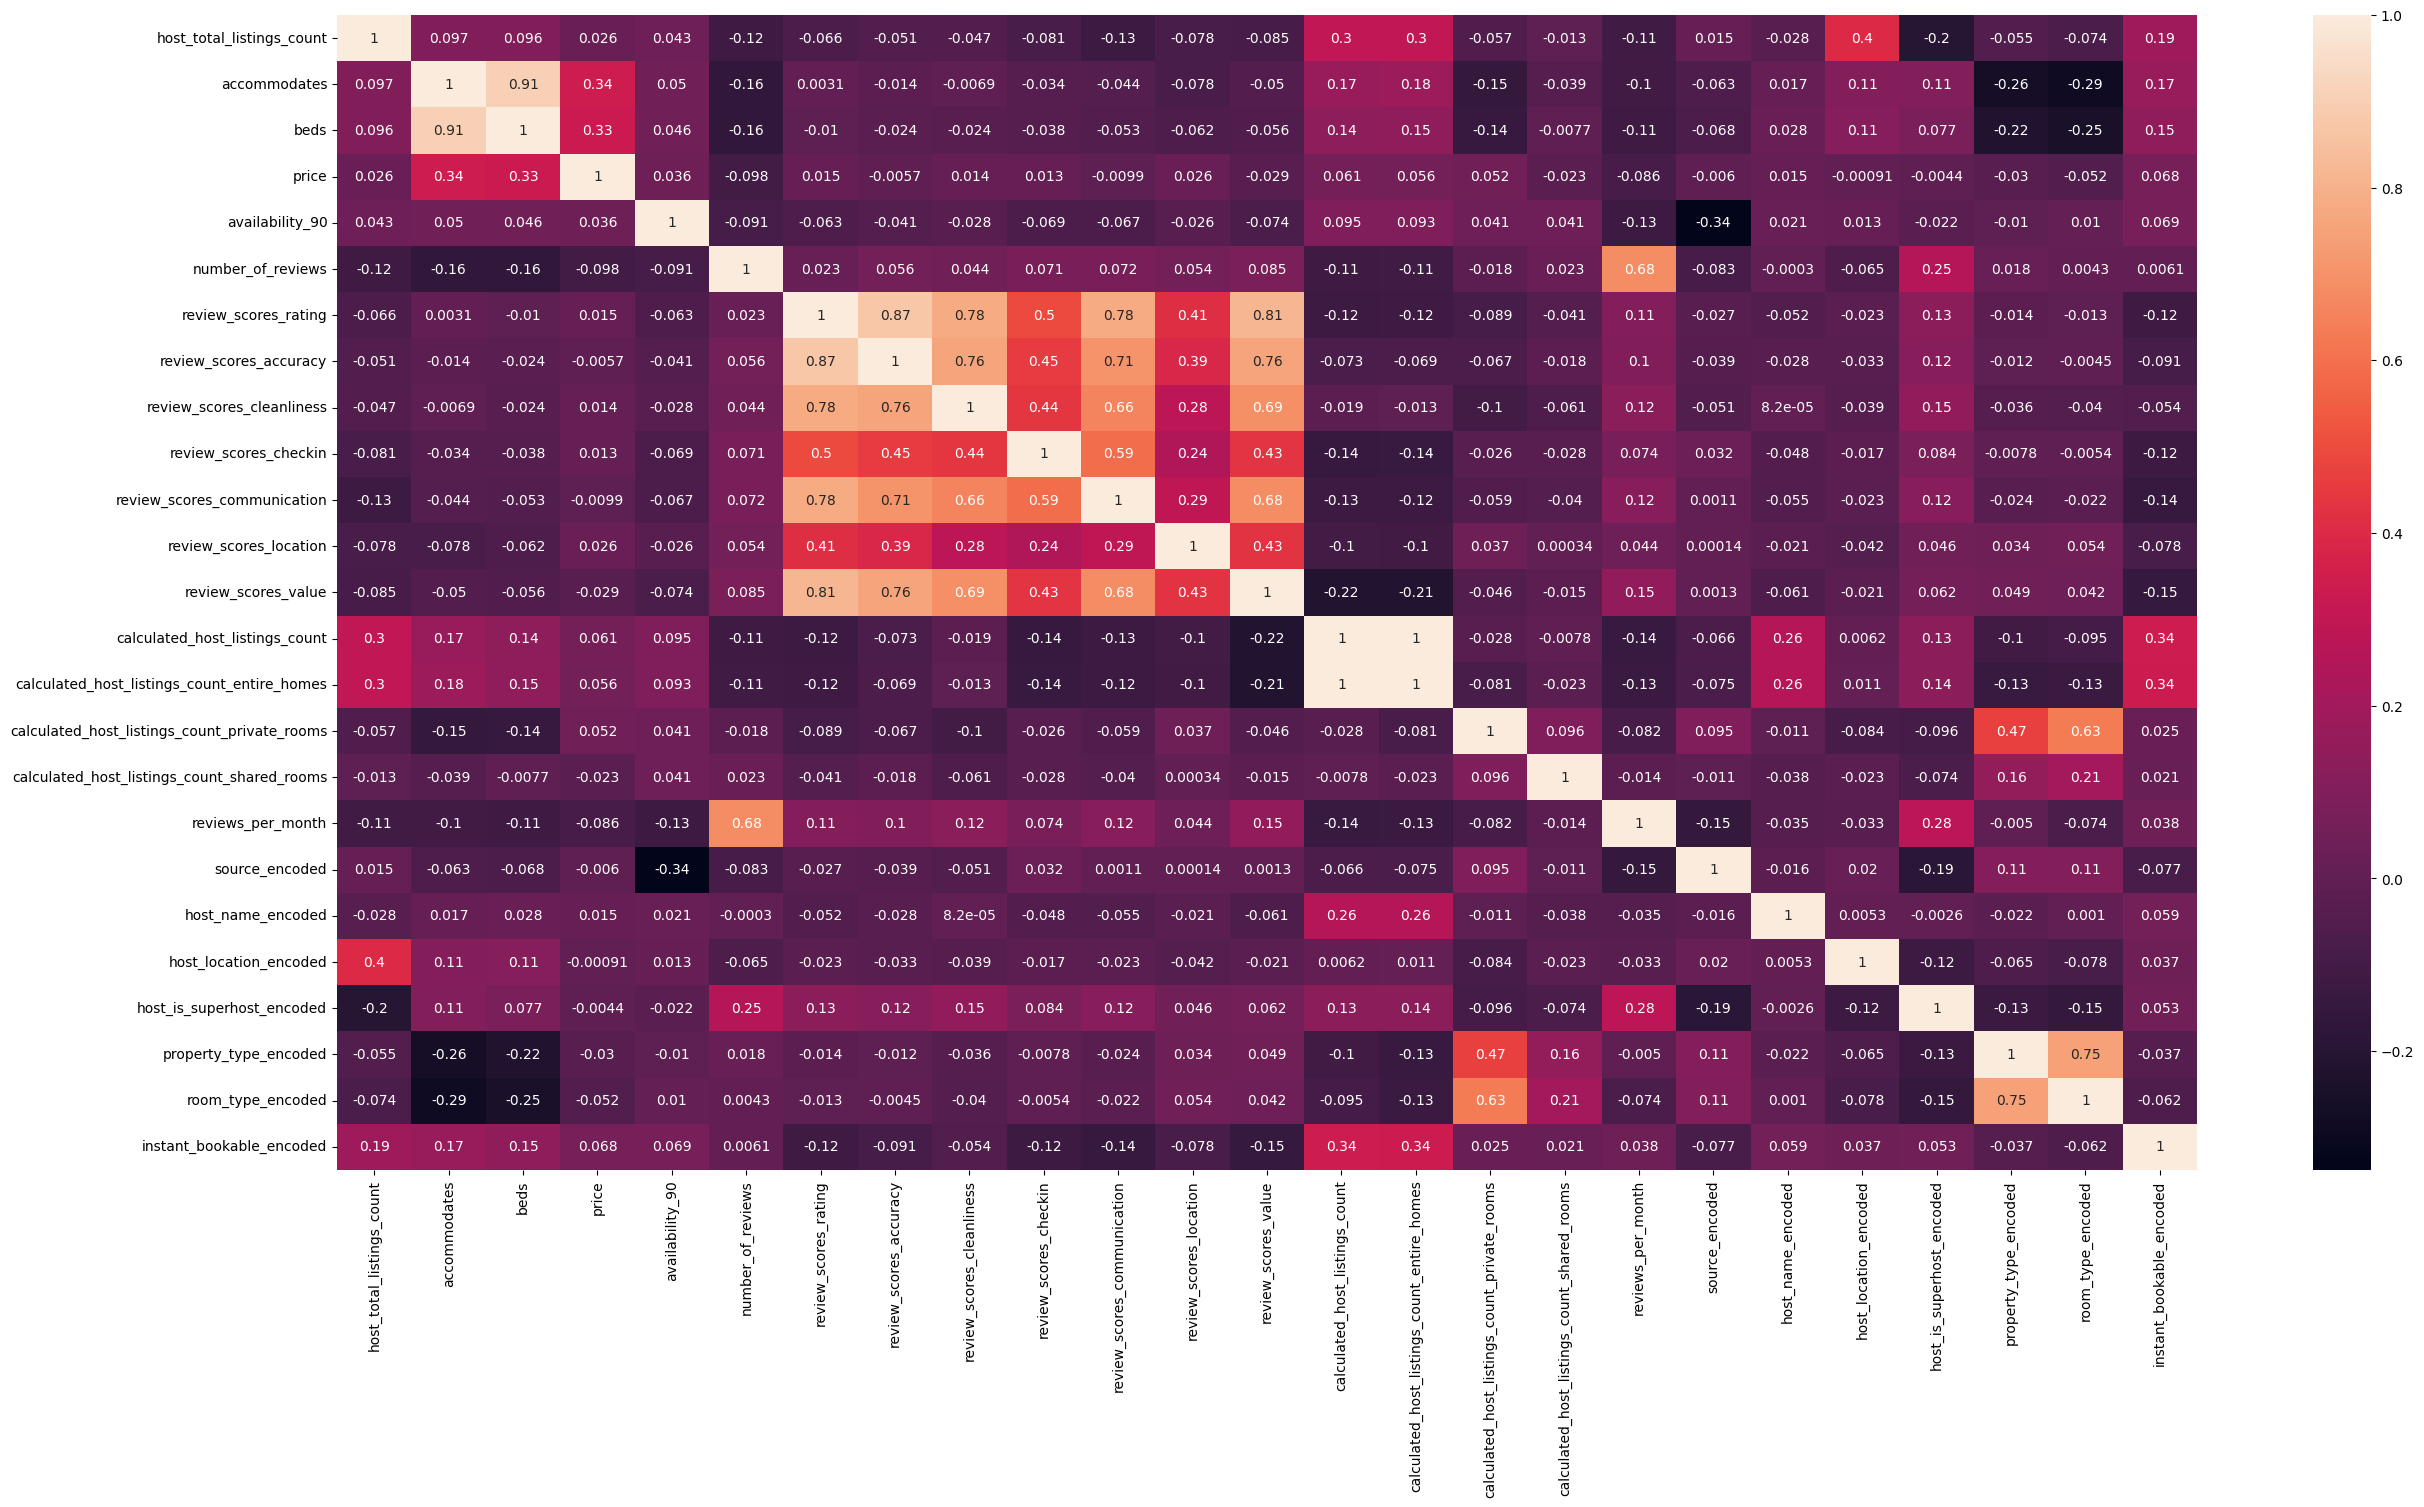

Correlation with the 'price' column:
price                                           1.000000
accommodates                                    0.337373
beds                                            0.326877
instant_bookable_encoded                        0.067673
calculated_host_listings_count                  0.060513
calculated_host_listings_count_entire_homes     0.056216
calculated_host_listings_count_private_rooms    0.052105
availability_90                                 0.035778
host_total_listings_count                       0.025718
review_scores_location                          0.025683
host_name_encoded                               0.015176
review_scores_rating                            0.014592
review_scores_cleanliness                       0.014211
review_scores_checkin                           0.013437
host_location_encoded                          -0.000906
host_is_superhost_encoded                      -0.004396
review_scores_accuracy                         -0.0

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE

# Function to read data from different file formats
def read_data(file_path, file_format='csv'):
    supported_formats = ['csv', 'excel', 'json']
    if file_format.lower() not in supported_formats:
        raise ValueError(f"Unsupported file format. Supported formats: {', '.join(supported_formats)}.")

    if file_format == 'csv':
        return pd.read_csv(file_path)
    elif file_format == 'excel':
        return pd.read_excel(file_path)
    elif file_format == 'json':
        return pd.read_json(file_path)

# Function to check missing values in the dataset
def check_missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values[missing_values > 0]

# Function to drop specified columns from the dataset
def drop_columns(data, columns_to_drop):
    return data.drop(columns=columns_to_drop, errors='ignore')

# Function to handle missing values in the dataset
def handle_missing_values(data, strategy='median'):
    numeric_columns = data.select_dtypes(include=['number']).columns
    non_numeric_columns = data.select_dtypes(exclude=['number']).columns

    # Handle missing values for numeric columns
    if strategy == 'median':
        data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
    elif strategy == 'mean':
        data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
    else:
        raise ValueError("Unsupported imputation strategy.")

    # Handle missing values for non-numeric columns
    if not data[non_numeric_columns].empty:
        mode_values = data[non_numeric_columns].mode().iloc[0]
        data[non_numeric_columns] = data[non_numeric_columns].fillna(mode_values)

    return data
# Function to encode categorical data into numerical formats
def encode_categorical_data(data, columns_to_encode):
    """
    Encode categorical data into numerical formats.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - columns_to_encode (list): List of columns containing categorical data.

    Returns:
    - pd.DataFrame: The dataset with encoded categorical columns.
    """
    le = LabelEncoder()
    for column in columns_to_encode:
        data[column + '_encoded'] = le.fit_transform(data[column])
    return data.drop(columns=columns_to_encode)



# Function to remove outliers based on z-score
def remove_outliers(df, columns, threshold=3):
    """
    Remove outliers from DataFrame using z-score method.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of columns to remove outliers from.
    - threshold: Threshold value for z-score. Data points with z-score greater than this value will be considered outliers.

    Returns:
    - DataFrame without outliers.
    """
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df = df[(z_scores < threshold).all(axis=1)]
    return df



#visualization
def plot_histogram(df, col, bins=20, title=None, xlabel=None, ylabel=None):
    """
    Function to plot histogram for a specific column in a DataFrame.

    Parameters:
        df (DataFrame): The pandas DataFrame.
        col (str): The column name for which the histogram is to be plotted.
        bins (int or sequence of scalars, optional): Specifies the number of bins or the bin edges. Default is 10.
        title (str, optional): The title of the histogram. Default is None.
        xlabel (str, optional): The label for the x-axis. Default is None.
        ylabel (str, optional): The label for the y-axis. Default is None.
    """
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.hist(df[col], bins=bins)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def generate_countplot(df, columns, hue=None):
    if hue:
        sns.catplot(data=df, x=columns[0], hue=hue, kind='count', aspect=2)
        plt.title(f'Count Plot for {columns[0]} with Hue {hue}')
    else:
        sns.catplot(data=df, x=columns[0], kind='count', aspect=2)
        plt.title(f'Count Plot for {columns[0]}')
    plt.show()

    

# Load the dataset
url = "listings.csv"
df = pd.read_csv(url)


df=df[['source','host_name','host_location',
       'host_is_superhost','host_total_listings_count','property_type', 'room_type','accommodates','beds','price',
         'availability_90','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
print(df.columns)




# Check for missing values
missing_values_summary = check_missing_values(df)
print("Missing Values Summary:")
print(missing_values_summary)


# Handle missing values
df = handle_missing_values(df)

missing_values_summary = check_missing_values(df)
print("Missing Values Summary after handeling:")
print(missing_values_summary)

# Encode categorical data
categorical_columns_to_encode = ['source']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)


categorical_columns_to_encode = ['host_name']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)

categorical_columns_to_encode = ['host_location']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)

categorical_columns_to_encode = ['host_is_superhost']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)


categorical_columns_to_encode = ['property_type']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)

categorical_columns_to_encode = ['room_type']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)

categorical_columns_to_encode = ['instant_bookable']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)







# Replace ',' and '$' with ''
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')


# Convert to float
df['price'] = df['price'].astype(float)



plt.figure(figsize=(30, 15))

print('the relations between the columns :')
sns.heatmap(df.corr(),annot=True)

plt.show()

# Calculate correlation with the 'price' column
price_correlation = df.corr()['price'].sort_values(ascending=False)

# Display the correlation values
print("Correlation with the 'price' column:")
print(price_correlation)

# Extract the most important columns (excluding the 'price' column itself)
most_important_columns = price_correlation[price_correlation.index != 'price']

# Display the most important columns related to price
print("\nThe most important columns related to the 'price' column:")
print(most_important_columns)


print('number of each values in neighbourhood_encoded :',df['beds'].value_counts())
print('number of each values in minimum_nights :',df['accommodates'].value_counts())
print('number of each values in minimum_nights :',df['availability_90'].value_counts())



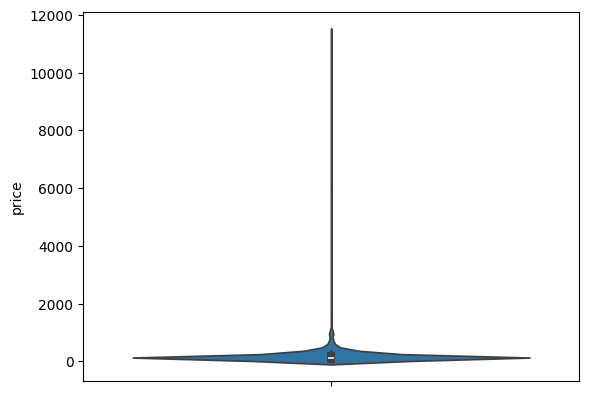

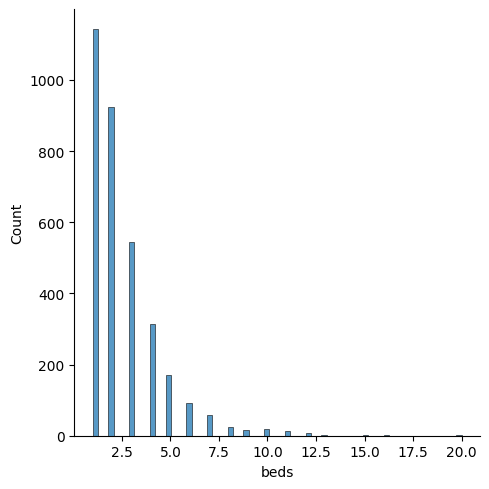

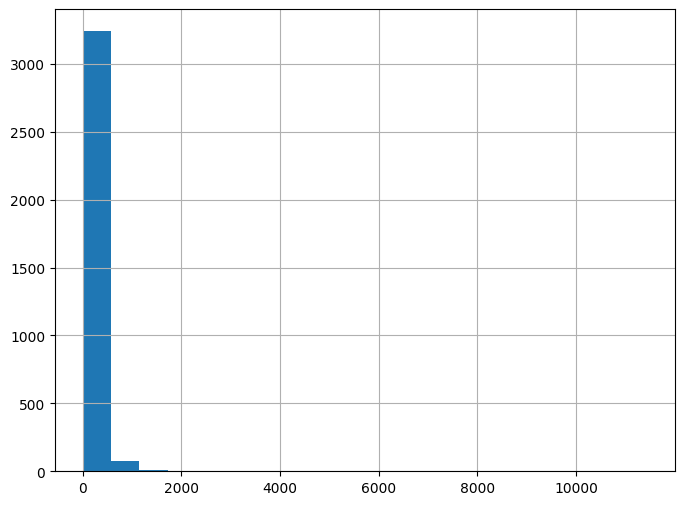

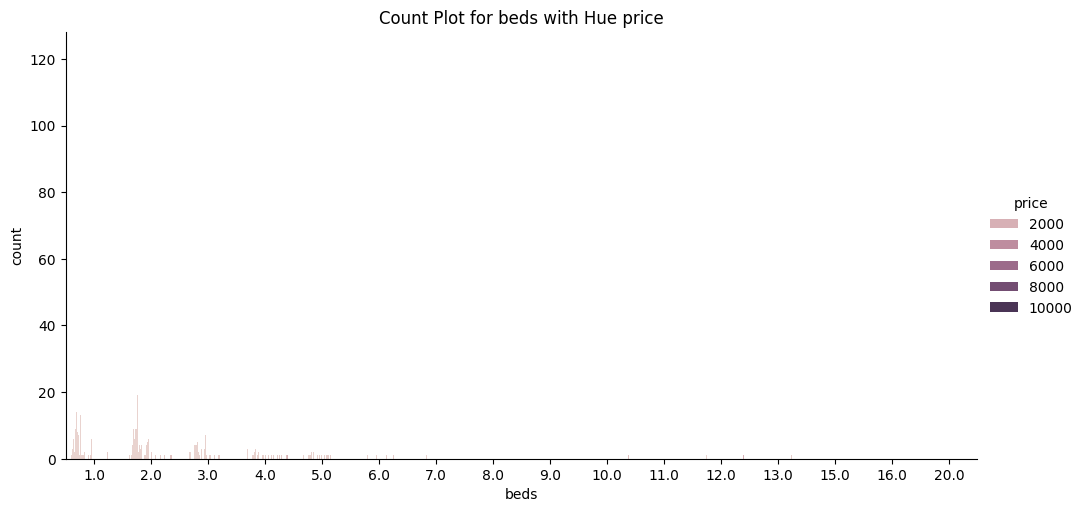

the relation of two column and colored according to another column


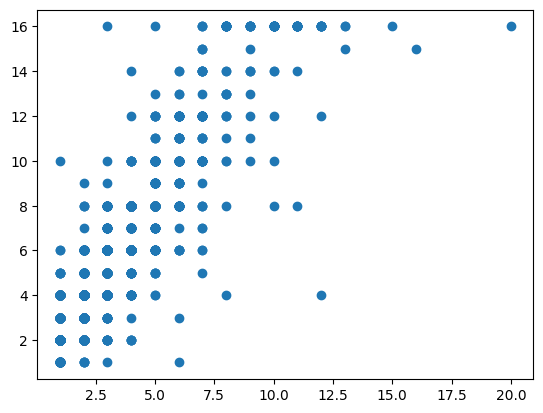

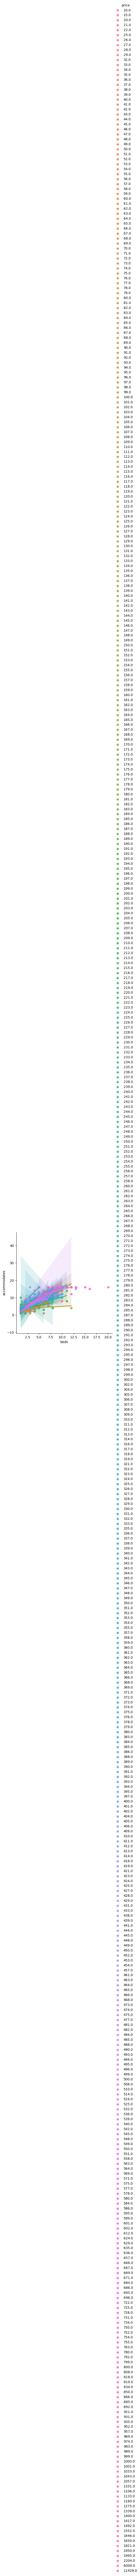

In [3]:
sns.violinplot(df['price'])
sns.displot(df['beds'])


plot_histogram(df,['price'])
generate_countplot(df, ['beds', 'accommodates'], hue='price')

plt.scatter(df['beds'],df['accommodates'] )



print('the relation of two column and colored according to another column')
sns.lmplot(x='beds', y='accommodates',data=df, hue='price')

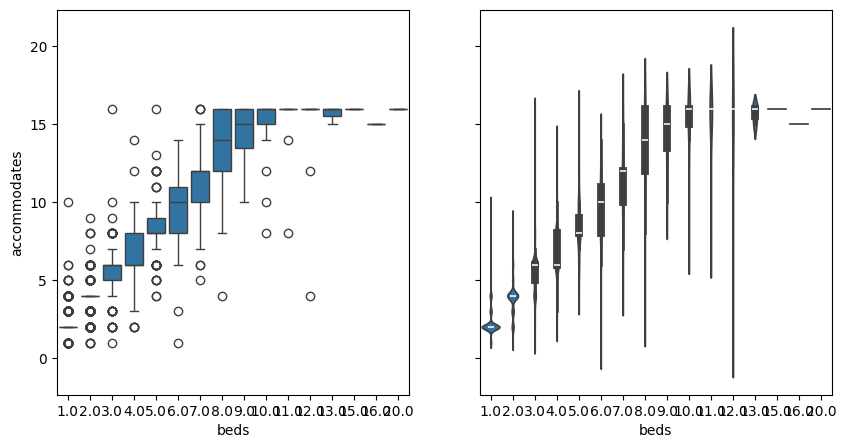

In [4]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
sns.boxplot(x='beds', y='accommodates', data=df, ax=axes[0])
sns.violinplot(x='beds', y='accommodates', data=df, ax=axes[1])
plt.show()

draw scatter and distribution for the values: 


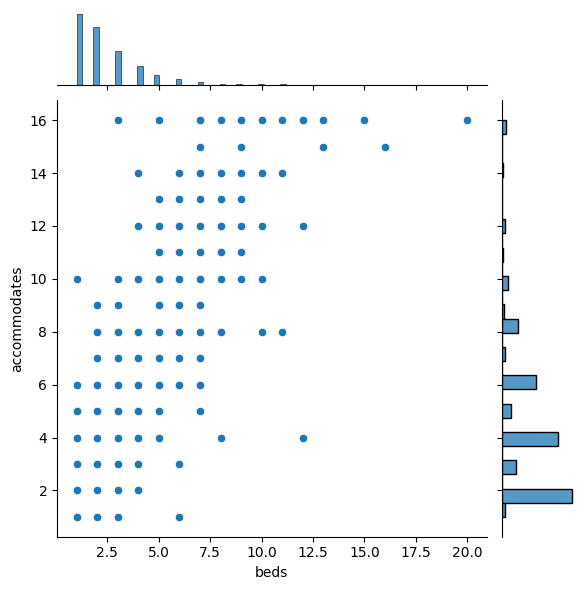

In [5]:
print('draw scatter and distribution for the values: ')
sns.jointplot(x='beds', y='accommodates',data=df,kind='scatter')